In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable


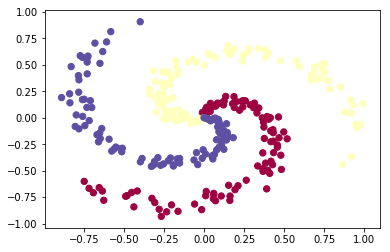

In [2]:

N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8')  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [3]:
dtype = torch.FloatTensor
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad=False)
el1 = torch.cat((torch.ones(100), torch.zeros(200)), 0)
el2 = torch.cat((torch.zeros(100), torch.ones(100), torch.zeros(100)), 0)
el3 = torch.cat((torch.zeros(200), torch.ones(100)), 0)
yy = torch.stack((el1, el2, el3), 1)
y1 = Variable(torch.stack((el1, el2, el3), 1), requires_grad=False)
h = 50  # size of hidden layer
w1 = Variable(0.5 * torch.randn(D, h), requires_grad=True)
b1 = Variable(torch.randn(1, h), requires_grad=True)
w2 = Variable(0.5 * torch.randn(h, K), requires_grad=True)
b2 = Variable(torch.randn((1, K)), requires_grad=True)


# some hyperparameters
learning_rate = 5e-6
# gradient descent loop
num_examples = x1.shape[0]
for i in range(100000):

    # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2  # output of NN
    # scores = output.clamp(min=0)
    scores = output

    # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print(i, loss)
    loss.backward()

    # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()  # Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()



0 tensor(1067.0277, grad_fn=<SumBackward0>)


10000 tensor(116.1314, grad_fn=<SumBackward0>)


20000 tensor(98.3079, grad_fn=<SumBackward0>)


30000 tensor(87.2751, grad_fn=<SumBackward0>)


40000 tensor(78.4802, grad_fn=<SumBackward0>)


50000 tensor(66.7363, grad_fn=<SumBackward0>)


60000 tensor(53.5428, grad_fn=<SumBackward0>)


70000 tensor(43.4297, grad_fn=<SumBackward0>)


80000 tensor(37.4724, grad_fn=<SumBackward0>)


90000 tensor(33.7509, grad_fn=<SumBackward0>)


In [5]:
# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100), torch.ones(100), torch.add(torch.ones(100), 1)), 0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
# scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores, 1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
# print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N * K - torch.sum(err)
print('The number of misclassified examples: ', error)


The number of misclassified examples:  tensor(7)
